In [8]:
#Question 49                           

import pandas as pd

dataset = pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name='Demography')
                    
dataset[dataset['gender']== 'Male'] 

,inpatient_number,gender,weight,height,BMI,occupation,ageCat
0,857781,Male,50.0,1.64,18.590125,UrbanResident,69-79
2,866418,Male,70.0,1.70,24.221453,farmer,59-69
3,775928,Male,65.0,1.70,22.491349,UrbanResident,69-79
6,844094,Male,60.0,1.65,22.038567,UrbanResident,79-89
12,802296,Male,70.0,1.72,23.661439,UrbanResident,79-89
...,...,...,...,...,...,...,...
1994,816947,Male,46.5,1.50,20.666667,UrbanResident,69-79
1997,750447,Male,60.0,1.68,21.258503,UrbanResident,79-89
2001,726701,Male,60.0,1.60,23.437500,UrbanResident,79-89
2005,781004,Male,75.0,1.70,25.951557,UrbanResident,39-49


In [3]:
#Question 50

dataset = pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name='Labs')
dataset.loc[dataset['pulse'] == dataset['pulse'].max()]

,inpatient_number,body_temperature,pulse,respiration,systolic_blood_pressure,diastolic_blood_pressure,map,fio2,creatinine_enzymatic_method,urea,...,measured_residual_base,measured_bicarbonate,carboxyhemoglobin,body_temperature_blood_gas,oxygen_saturation,partial_oxygen_pressure,oxyhemoglobin,anion_gap,free_calcium,total_hemoglobin
457,756996,36.0,198,19,105,69,81.0,33,64.3,4.78,...,1.7,24.8,0.8,37.0,98.0,125.0,97.6,12.5,1.07,132.0


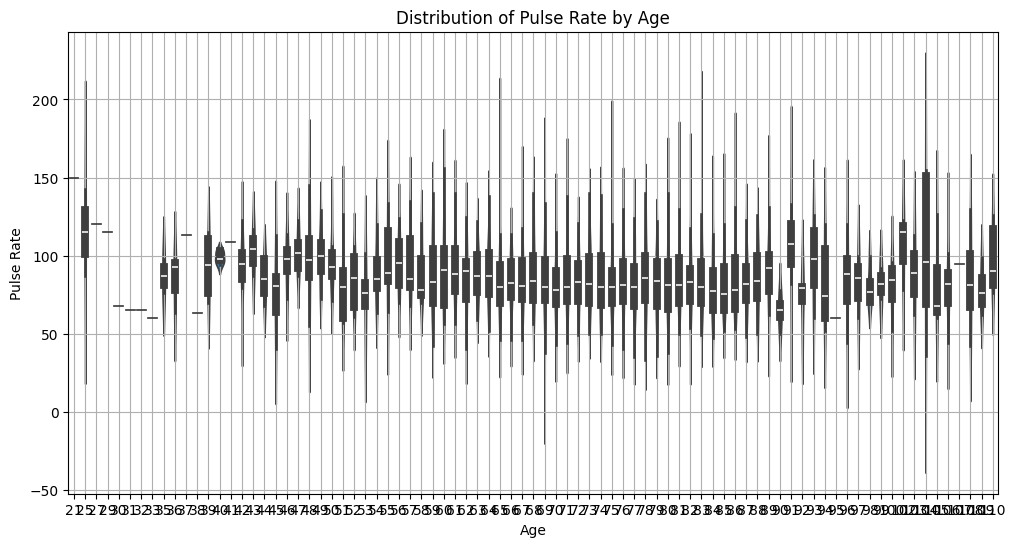

In [4]:
#Question 51

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Excel file
file_path = 'Cardiac_Outcomes.xlsx'
data = pd.read_excel(file_path)

# Extracting data from the 'Labs' and 'Demography' sheets
labs_data = pd.read_excel(file_path, sheet_name='Labs')
demography_data = pd.read_excel(file_path, sheet_name='Demography')

# Merge the datasets on the 'inpatient_number' column
merged_data = pd.merge(labs_data[['inpatient_number', 'pulse']], demography_data[['inpatient_number', 'age']], on='inpatient_number')

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Create a violin plot
sns.violinplot(x='age', y='pulse', data=merged_data)

# Set titles and labels
plt.title('Distribution of Pulse Rate by Age')
plt.xlabel('Age')
plt.ylabel('Pulse Rate')

# Show the plot
plt.grid(True)
plt.show()


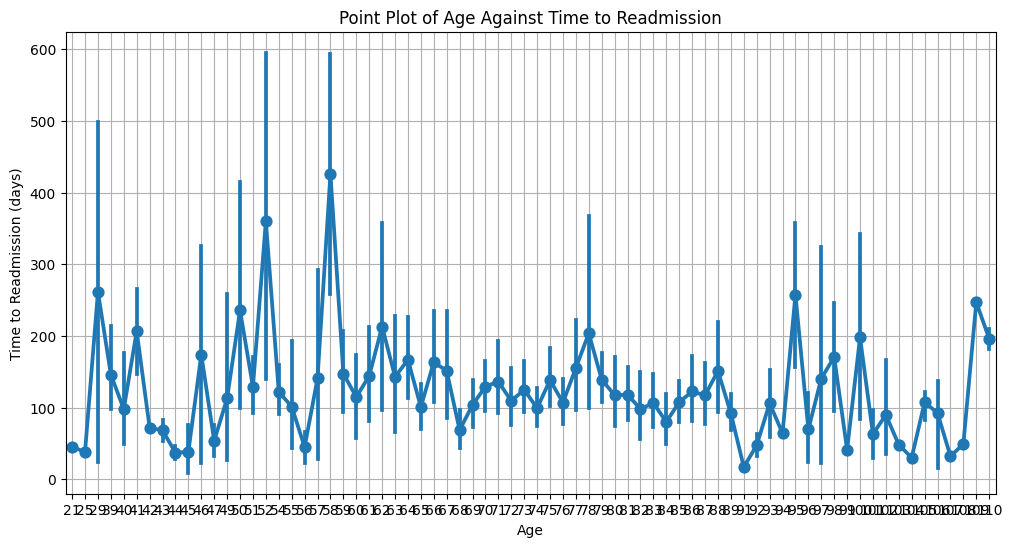

In [9]:
#Question 52

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Excel file
file_path = 'Cardiac_Outcomes.xlsx'

# Extract data from the 'Labs', 'Demography', and 'Hospitalization_Discharge' sheets
labs_data = pd.read_excel(file_path, sheet_name='Labs')
demography_data = pd.read_excel(file_path, sheet_name='Demography')
hospitalization_data = pd.read_excel(file_path, sheet_name='Hospitalization_Discharge')

# Merge the 'Demography' data with 'Hospitalization_Discharge' data
readmission_data = hospitalization_data[['inpatient_number', 'readmission_time_days_from_admission']]
age_readmission_data = pd.merge(demography_data[['inpatient_number', 'age']], readmission_data, on='inpatient_number')

# Remove any rows with NaN values as they cannot be plotted
age_readmission_data.dropna(inplace=True)

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Create a point plot
sns.pointplot(x='age', y='readmission_time_days_from_admission', data=age_readmission_data)

# Set titles and labels
plt.title('Point Plot of Age Against Time to Readmission')
plt.xlabel('Age')
plt.ylabel('Time to Readmission (days)')

# Show the plot
plt.grid(True)
plt.show()


In [11]:
# Question 54
numbers = [0,1,2,4,6,8]

for i in numbers:
    if i > 0 and i % 2 == 0:
        print(i*i)

4
16
36
64


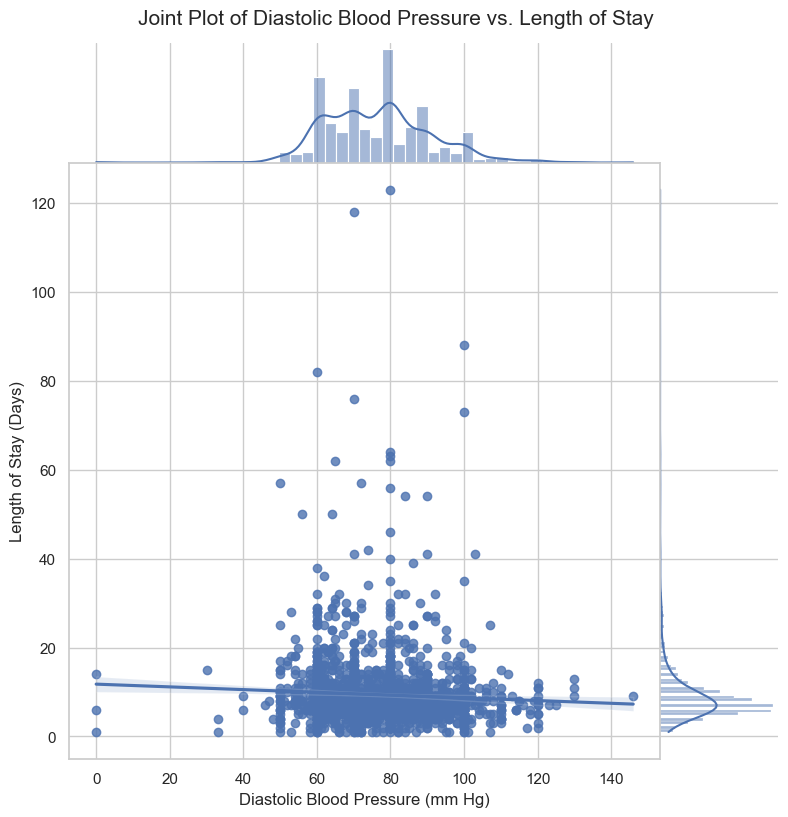

In [12]:
#Question 55

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Excel file
file_path = 'Cardiac_Outcomes.xlsx'

# Extract data from the 'Labs', 'Demography', and 'Hospitalization_Discharge' sheets
labs_data = pd.read_excel(file_path, sheet_name='Labs')
hospitalization_data = pd.read_excel(file_path, sheet_name='Hospitalization_Discharge')

# Merge the required columns from both sheets
diastolic_bp_data = labs_data[['inpatient_number', 'diastolic_blood_pressure']]
length_of_stay_data = hospitalization_data[['inpatient_number', 'dischargeDay']]
joint_data = pd.merge(diastolic_bp_data, length_of_stay_data, on='inpatient_number')

# Remove any rows with NaN values to ensure accurate plotting
joint_data.dropna(inplace=True)

# Create a joint plot
sns.set_theme(style="whitegrid")
joint_plot = sns.jointplot(x='diastolic_blood_pressure', y='dischargeDay', data=joint_data,
                           kind="reg", height=8, space=0)

# Set titles and labels
joint_plot.set_axis_labels('Diastolic Blood Pressure (mm Hg)', 'Length of Stay (Days)', fontsize=12)
joint_plot.fig.suptitle('Joint Plot of Diastolic Blood Pressure vs. Length of Stay', fontsize=15, y=1.02)

# Show the plot
plt.show()


In [16]:
#Question 56
data = demography_data.loc[101:200, ['ageCat', 'weight']]
data

,ageCat,weight
101,69-79,41.0
102,79-89,64.0
103,79-89,61.0
104,79-89,40.0
105,69-79,73.0
...,...,...
196,59-69,62.0
197,79-89,50.0
198,89-110,50.0
199,69-79,50.0


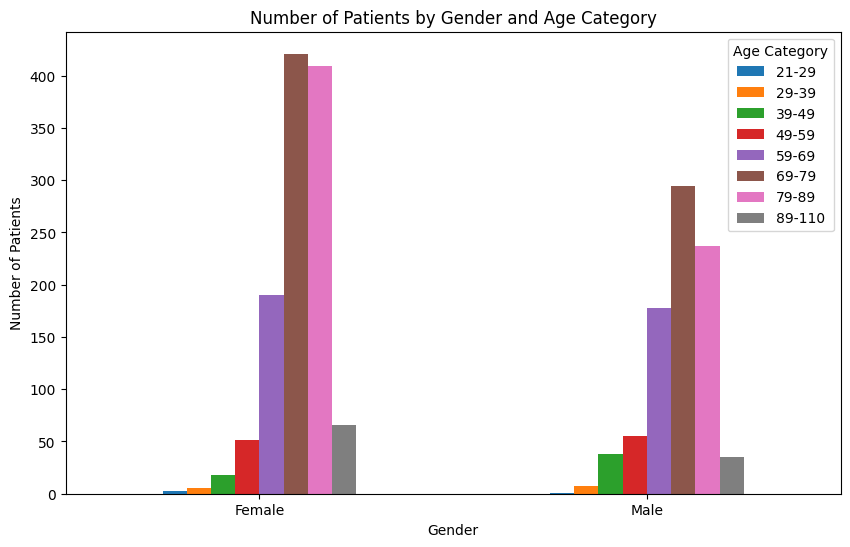

In [1]:
#Question 64

import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = 'Cardiac_Outcomes.xlsx'

# Extract data from the 'Labs', 'Demography', and 'Hospitalization_Discharge' sheets
data = pd.read_excel(file_path, sheet_name='Demography')

# Assuming 'ageCat' is your age category column and 'gender' is your gender column
# Group the data by 'gender' and 'ageCat' and count the number of patients in each group
grouped_data = data.groupby(['gender', 'ageCat']).size().unstack(fill_value=0)

# Plotting the grouped bar chart
grouped_data.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Patients by Gender and Age Category')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)  # Keep the labels on the x-axis readable
plt.legend(title='Age Category')
plt.show()


In [5]:
#Question 62

import pandas as pd

file_path = 'Cardiac_Outcomes.xlsx'

# Extract data from the 'Labs', 'Demography', and 'Hospitalization_Discharge' sheets
data = pd.read_excel(file_path, sheet_name='Hospitalization_Discharge')
data_labs = pd.read_excel(file_path, sheet_name='Labs')

merged_data = pd.merge(data[['DestinationDischarge', 'death_within_28_days', 'inpatient_number']], data_labs[['mean_platelet_volume', 'inpatient_number']], on='inpatient_number')

# Filter patients with an outcome of "Alive"
alive_patients = merged_data[merged_data['DestinationDischarge'] == 'Home']

# Filter patients from the above group who died within 28 days
alive_and_died_within_28_days = alive_patients[alive_patients['death_within_28_days'] == 1]

# Calculate the percentage of such patients
percent_died_within_28 = (len(alive_and_died_within_28_days) / len(alive_patients)) * 100

# Calculate the mean platelet volume among this group, assuming 'mean_platelet_volume' is a column in your dataset
mean_platelet_volume = alive_and_died_within_28_days['mean_platelet_volume'].mean()

print(f"Percentage of patients with an outcome of 'Alive' who died within 28 days: {percent_died_within_28:.2f}%")
print(f"Mean Platelet Volume among this group: {mean_platelet_volume}")


Percentage of patients with an outcome of 'Alive' who died within 28 days: 1.04%
Mean Platelet Volume among this group: 10.592857142857143


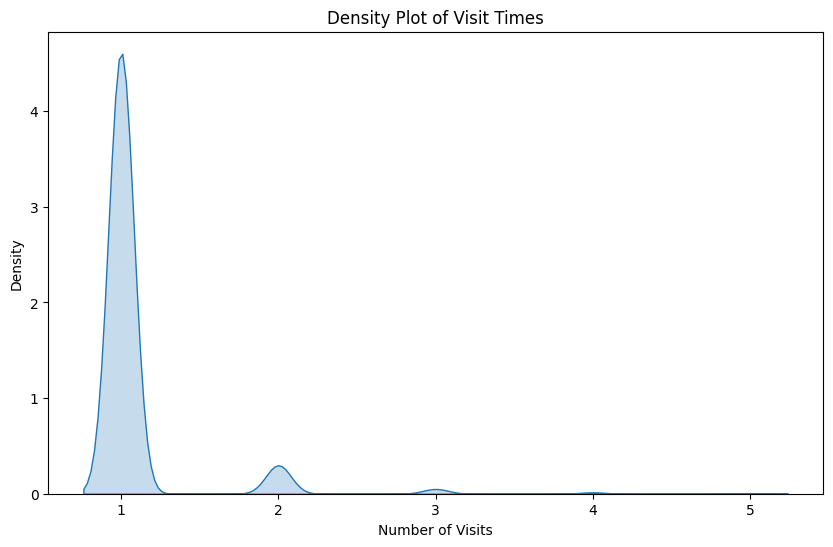

In [6]:
#Question 60

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'Cardiac_Outcomes.xlsx'

# Extract data from the 'Labs', 'Demography', and 'Hospitalization_Discharge' sheets
data = pd.read_excel(file_path, sheet_name='Hospitalization_Discharge')

# Ensure the 'visit_times' column is in a proper numeric format
data['visit_times'] = pd.to_numeric(data['visit_times'], errors='coerce')

# Drop any rows with NaN values in 'visit_times' after the conversion
data = data.dropna(subset=['visit_times'])

# Creating the density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data['visit_times'], fill=True)
plt.title('Density Plot of Visit Times')
plt.xlabel('Number of Visits')
plt.ylabel('Density')
plt.show()
